<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
df = pd.read_csv('malaria.csv')
df.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df.isnull().all(axis=1).sum()

4

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df.isnull().sum(axis=0)

Cases_Guinea            34
Cases_Liberia           44
Cases_SierraLeone       40
Cases_Nigeria           89
Cases_Senegal          102
Cases_UnitedStates      54
Cases_Spain            111
Cases_Mali             115
Deaths_Guinea           35
Deaths_Liberia          46
Deaths_SierraLeone      40
Deaths_Nigeria          89
Deaths_Senegal         105
Deaths_UnitedStates     70
Deaths_Spain           111
Deaths_Mali            115
dtype: int64

In [5]:
df2=df.isnull().sum(axis=0)/df.shape[0]*100
mask=df.isnull().sum(axis=0)/df.shape[0]*100 > 60
df2[mask]

Cases_Nigeria     70.078740
Cases_Senegal     80.314961
Cases_Spain       87.401575
Cases_Mali        90.551181
Deaths_Nigeria    70.078740
Deaths_Senegal    82.677165
Deaths_Spain      87.401575
Deaths_Mali       90.551181
dtype: float64

In [6]:
df2=df.isnull().sum(axis=0)/df.shape[0]*100
df2[df2>60]

Cases_Nigeria     70.078740
Cases_Senegal     80.314961
Cases_Spain       87.401575
Cases_Mali        90.551181
Deaths_Nigeria    70.078740
Deaths_Senegal    82.677165
Deaths_Spain      87.401575
Deaths_Mali       90.551181
dtype: float64

In [11]:
print(df.dropna(thresh=127*0.4 , axis=1).columns)  #The column that you neede have been drooped, dropna is showing columns after 
                                            # removing unnecessary columns  

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_UnitedStates', 'Deaths_Guinea', 'Deaths_Liberia',
       'Deaths_SierraLeone', 'Deaths_UnitedStates'],
      dtype='object')


In [ ]:
If you are asked to show unnecessary columns use mask and if you are asked to show columns after removing unnecessary columns 
use dropna with thresh and axis=0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
df1 = df[['Cases_Guinea','Deaths_Guinea']]
df2 = df[['Cases_Liberia','Deaths_Liberia']]
df3= df[['Cases_SierraLeone','Deaths_SierraLeone']]
df4= df[['Cases_Nigeria','Deaths_Nigeria']]
df5=df[['Cases_Senegal','Deaths_Senegal']]
df6=df[['Cases_UnitedStates','Deaths_UnitedStates']]
df7=df[['Cases_Spain','Deaths_Spain']]
df8=df[['Cases_Mali','Deaths_Mali']]
Guinea= df1.isnull().sum().sum()
Liberia= df2.isnull().sum().sum()
SierraLeone= df3.isnull().sum().sum()
Nigeria= df4.isnull().sum().sum()
Senegal= df5.isnull().sum().sum()
UnitedStates= df6.isnull().sum().sum()
Spain= df7.isnull().sum().sum()
Mali= df8.isnull().sum().sum()
print('The Null Entries in Guinea is ',Guinea)
print('The Null Entries in Liberia is ',Liberia)
print('The Null Entries in SierraLeone is ',SierraLeone)
print('The Null Entries in Nigeria is ',Nigeria)
print('The Null Entries in Senegal is ',Senegal)
print('The Null Entries in UnitedStates is ',UnitedStates)
print('The Null Entries in Spain is ',Spain)
print('The Null Entries in Mali is ',Mali)

The Null Entries in Guinea is  69
The Null Entries in Liberia is  90
The Null Entries in SierraLeone is  80
The Null Entries in Nigeria is  178
The Null Entries in Senegal is  207
The Null Entries in UnitedStates is  124
The Null Entries in Spain is  222
The Null Entries in Mali is  230


In [ ]:
As it has been asked to consider only first four countries, Nigeria has most number of null values hence 
its observations should be recoded again.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df.isnull()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
1,False,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True
2,False,False,False,True,True,False,True,True,False,False,False,True,True,False,True,True
3,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True
123,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
124,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True
125,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True


<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
df.dropna(thresh=2 , axis=0,how='any')

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
df[df.dropna(thresh=127*0.4 , axis=1).columns]

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,66.0,6.0,5.0,NaN
123,86.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,59.0,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
df.Cases_Liberia.skew()

0.9491336030709361

In [39]:
df.Cases_Liberia.fillna(value=df.Cases_Liberia.median())

0      2335.337349
1      2335.337349
2      8166.000000
3      8157.000000
4      2335.337349
          ...     
122       8.000000
123    2335.337349
124    2335.337349
125    2335.337349
126    2335.337349
Name: Cases_Liberia, Length: 127, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
df.Cases_UnitedStates.skew()

0.4685235032170701

In [46]:
df.Cases_UnitedStates.fillna(value=df.Cases_UnitedStates.median())

0      14.068493
1      14.068493
2      20.000000
3      10.000000
4      14.068493
         ...    
122    14.068493
123    14.068493
124    14.068493
125    14.068493
126    14.068493
Name: Cases_UnitedStates, Length: 127, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
df1

,Cases_Guinea,Deaths_Guinea
0,2776.0,1786.0
1,2775.0,1781.0
2,2769.0,1767.0
3,NaN,NaN
4,NaN,NaN
...,...,...
122,103.0,66.0
123,86.0,62.0
124,86.0,60.0
125,86.0,59.0


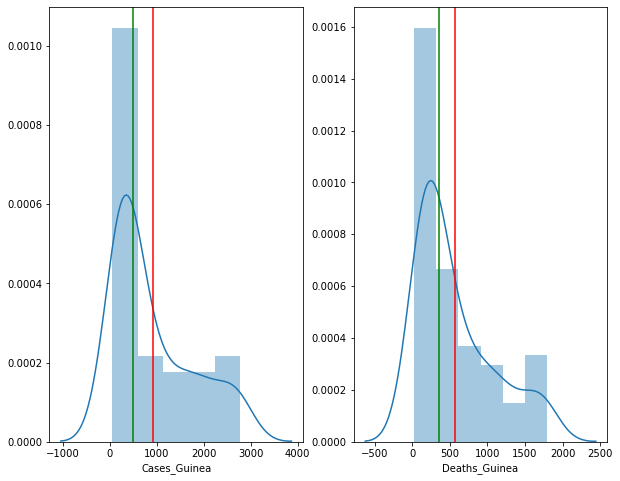

In [45]:
fig,ax=plt.subplots(1,2,figsize=(10,8))
sns.distplot(df1.Cases_Guinea,ax=ax[0])
sns.distplot(df1.Deaths_Guinea,ax=ax[1])
ax[0].axvline(df1.Cases_Guinea.mean(),color='red')
ax[0].axvline(df1.Cases_Guinea.median(),color='green')
ax[1].axvline(df1.Deaths_Guinea.mean(),color='red')
ax[1].axvline(df1.Deaths_Guinea.median(),color='green')
plt.show()

In [47]:
df1.Cases_Guinea.fillna(value=df1.Cases_Guinea.median())

0      2776.0
1      2775.0
2      2769.0
3       495.0
4       495.0
        ...  
122     103.0
123      86.0
124      86.0
125      86.0
126      49.0
Name: Cases_Guinea, Length: 127, dtype: float64

In [48]:
df1.Deaths_Guinea.fillna(value=df1.Deaths_Guinea.median())

0      1786.0
1      1781.0
2      1767.0
3       360.5
4       360.5
        ...  
122      66.0
123      62.0
124      60.0
125      59.0
126      29.0
Name: Deaths_Guinea, Length: 127, dtype: float64

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [3]:
dfh = pd.read_csv('house.csv')
dfh.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

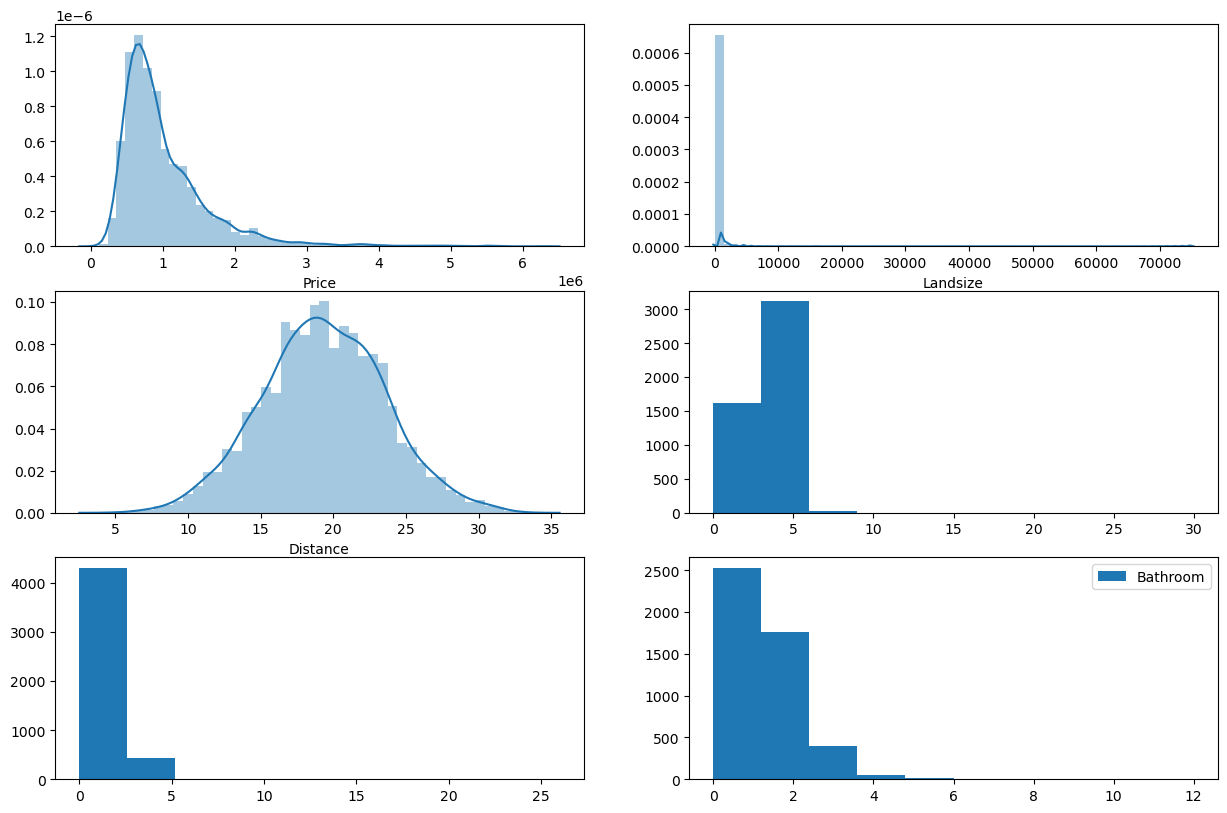

In [4]:
fig,ax = plt.subplots(3,2,figsize=(15,10),dpi=100)
sns.distplot(dfh['Price'],ax=ax[0,0])
sns.distplot(dfh['Landsize'],ax=ax[0,1])
sns.distplot(dfh['Distance'],ax=ax[1,0])
ax[1,1].hist(dfh['Bedroom'],label='Bedroom')
ax[2,0].hist(dfh['Car'],label='Car')
ax[2,1].hist(dfh['Bathroom'],label='Bathroom')
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

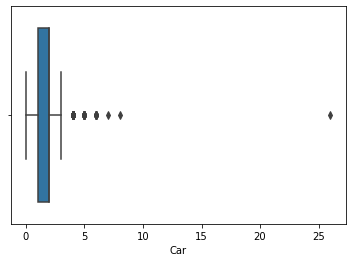

In [5]:
sns.boxplot(dfh.Car)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

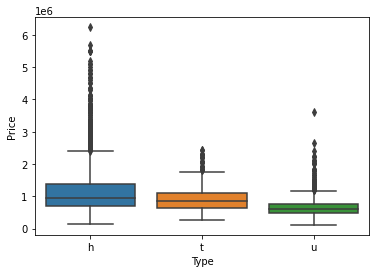

In [6]:
sns.boxplot(y=dfh['Price'],x=dfh['Type'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

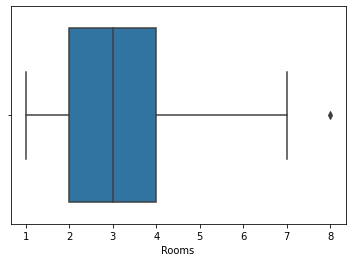

In [7]:
sns.boxplot(dfh.Rooms)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

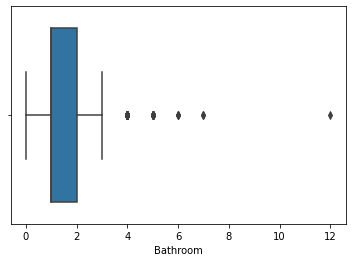

In [8]:
sns.boxplot(dfh.Bathroom)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

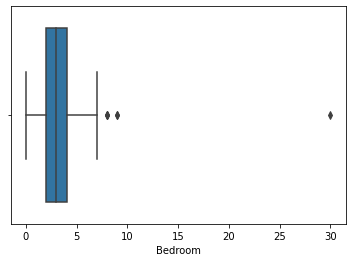

In [9]:
sns.boxplot(dfh.Bedroom)
plt.show()

In [10]:
q1= dfh['Bedroom'].quantile(0.25)
q2= dfh['Bedroom'].quantile(0.5)
q3= dfh['Bedroom'].quantile(0.75)
iqr = q3- q1
LL = q1 - 1.5*iqr
UL = q3 + 1.5*iqr

df = dfh[(dfh['Bedroom'] < LL) | (dfh['Bedroom'] > UL)]
df

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30
4241,3,h,825000,S,Eastern Metropolitan,2,2,296,21.2,8
4249,3,t,750000,S,Western Metropolitan,2,0,311,22.1,8


<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
avg_orignal = dfh['Distance'].mean()
q1= dfh['Distance'].quantile(0.25)
q2= dfh['Distance'].quantile(0.5)
q3= dfh['Distance'].quantile(0.75)
iqr = q3- q1
LL = q1 - 1.5*iqr
UL = q3 + 1.5*iqr

df = dfh['Distance'][(dfh['Distance'] > LL) & (dfh['Distance'] < UL)]
avg_after_iqr = df.mean()
print('The Orignal average and Average after iqr outliers treatment is ', avg_orignal , 'and' , avg_after_iqr , 'respectively' )

The Orignal average and Average after iqr outliers treatment is  19.32834662190515 and 19.311425554382247 respectively


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

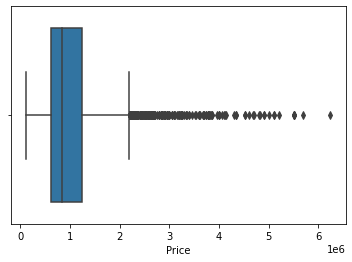

In [12]:
sns.boxplot(dfh.Price)
plt.show()

In [13]:
q1= dfh['Price'].quantile(0.25)
q2= dfh['Price'].quantile(0.5)
q3= dfh['Price'].quantile(0.75)
iqr = q3- q1
LL = q1 - 1.5*iqr
UL = q3 + 1.5*iqr
print(iqr)
print(UL)

outlier_min = dfh['Price'].sort_values().tail(7).min()
print(outlier_min)
K = (outlier_min - q3 ) / iqr
print(K)

624250.0
2180625.0
5200000
6.336804164997997


In [14]:
dfh['Price'].sort_values().tail(7)

405     5200000
3417    5500000
2838    5500000
4242    5500000
1450    5510000
978     5700000
1820    6240000
Name: Price, dtype: int64

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
dfh.Distance.describe()

count    4766.000000
mean       19.328347
std         4.230650
min         5.000000
25%        16.500000
50%        19.300000
75%        22.200000
max        33.100000
Name: Distance, dtype: float64

In [16]:
np.linspace(start=dfh.Distance.min() , stop=dfh.Distance.max() , num = 4)

array([ 5.        , 14.36666667, 23.73333333, 33.1       ])

In [28]:
#for value in dfh['Distance']:
#    if (value>=5) & (value<14):
#        dfh['Distance_Category'] = 'Walkable'
#   elif (value>=14) &  (value<23):
 #       dfh['Distance_Category'] = 'Drivable'
#    else:
 #       dfh['Distance_Category'] = 'Long'

In [17]:
l=[]
for value in dfh['Distance']:
    if (value>=5) & (value<14):
        l.append('Walkable')
    elif (value>=14) &  (value<23):
        l.append('Short')
    else:
        l.append('Long')

In [18]:
dfh['Distance_Category']  = l

In [19]:
dfh.tail()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Distance_Category
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3,Short
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4,Short
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3,Long
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3,Short
4765,3,h,800000,SP,South-Eastern Metropolitan,1,1,0,13.7,3,Walkable


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Distance_Category
Long        1.019908e+06
Short       1.020445e+06
Walkable    1.012955e+06
Name: Price, dtype: float64


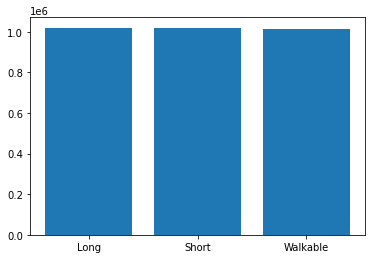

In [20]:
s_houseprice = dfh['Price'].groupby(by=dfh['Distance_Category']).mean()
print(s_houseprice)
plt.bar(x=s_houseprice.index , height=s_houseprice.values)
plt.show()

In [41]:
#s_houseprice = dfh.pivot_table(index=dfh['Distance_Category'].value_counts().index,values=dfh['Price'],aggfunc='mean')
#plt.bar(x=s_houseprice.index , y=s_houseprice.values)
#plt.show()
#s_houseprice

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
from sklearn.model_selection import train_test_split
x = dfh.iloc[:,[0,1,3,4,5,6,7,8,9]]
y = dfh.iloc[:,2]
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,random_state=0)

In [56]:
x_train.shape

(3812, 9)

In [57]:
y_train.shape

(3812,)

In [58]:
x_test.shape

(954, 9)

In [59]:
y_test.shape

(954,)